# Exercise 1
Note: This exercise closely follows the post by Scott Fortmann-Roe about bias-variance tradeoff (see: http://scott.fortmann-roe.com/docs/BiasVariance.html). It is recommended that you think about each of the questions before referring to that essay.

In this exercise you will get familiar with a **non-parapmetric** learning algorithm called k-Nearest Neighbours (kNN), and will implement it. You will then analyse the bias-variance tradeoff and try to come up with the optimal kNN classifier for the given data.

For this exercise we will use hypothetical and artificial generated data.


## Implement k-Nearest Neighbours (kNN)

The kNN algorithm is simple - given a labeled sample set data, and a new sample, predict the label of this sample by using majority vote (or averaging) over the labels of the k-nearest neighbour of the new data in the sample set.

For this task, assume each data point is an n-dimensional point in $\mathbb{R}^n$, and each label is either 0 or 1.

Implement a class called KNNClassifier and two methods:
- `fit`: should recieve the training data (an array of shape [n_samples, n_features]) and their labels (array of shape [n_samples]). 
- `predict`: should recieve a set of data (an array of shape [n_samples, n_features]) and **return** their predicted labels (array of shape [n_samples]).

Use simple Euclidean distance to measure the distance between two points. In case two points in the training have the same distance from a given point to predict, the nearest would be the one appearing first in the training set. 

Use majority vote between all kNN of a point to predict its label. In case the vote of all kNN is tied, you may predict whichever label you wish.

You may look up [sklearn.neighbors.KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for reference.



In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
 
sns.set(rc={"figure.figsize": (5, 5)})
sns.set_style('white')


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def true_boundary_voting_pred(wealth, religiousness):
    return religiousness-0.1*((wealth-5)**3-wealth**2+(wealth-6)**2+80)

def generate_data(m):
    X = np.random.uniform(low=0.0, high=10.0, size=(m,2))
    y = np.sign(true_boundary_voting_pred(X[:,0], X[:,1]))
    y[y==0] = 1
    samples_to_flip = np.random.randint(0,m//10)
    flip_ind = np.random.choice(m, samples_to_flip, replace=False)
    y[flip_ind] = -y[flip_ind]
    return X, y

def plot_labeled_data(X, y, ax =None):
    republicans = (y==1)
    democrats = (y==-1)
    if ax == None:
        fig, ax = plt.subplots(1,1)
    ax.scatter(X[republicans,0], X[republicans,1], c='r')
    ax.scatter(X[democrats,0], X[democrats,1], c='b')
    ax.set_xlabel('Wealth')
    ax.set_ylabel('Religiousness')
    ax.set_xlim([0, 10]);
    ax.set_ylim([0, 10]);
    ax.set_title('Red circles represent Republicans, Blues Democrats')
    ax.plot(np.linspace(0,10,1000), -true_boundary_voting_pred(np.linspace(0,10,1000), np.zeros(1000)), linewidth=2, c='k');
X, y = generate_data(m=500)

#plot_labeled_data(X, y)



In [9]:
from collections import Counter
class kNNClassifier:
    """ fit: should recieve the training data (an array of shape [n_samples, n_features]) and their labels
    (array of shape [n_samples]) """
    """ predict: should recieve a set of data (an array of shape [n_samples, n_features]) and return their predicted labels 
    (array of shape [n_samples]) """
    
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def euclidean_distance(self, X_test):
        """calculate euclidean distance between a point and all the other points in the dataset"""
        distance = X_test - self.X_train
        euclid_matrix = []
        for index, row in enumerate(distance):
            euclid_matrix.append((np.sqrt(sum([col**2 for col in row])), self.y_train[index]))

        return euclid_matrix
    
    def fit(self, X_train, y_train): 
        """extract x,y values from the data points and return to class"""
                
        self.X_train = X_train
        self.y_train = y_train    

    def predict(self, X_test):
        """call euclidean list function on each data point for all other data already in the list"""
        
        euclid_matrix = [self.euclidean_distance(pt) for pt in X_test]
        
        sorted_euclid_matrix = [sorted(val, key = lambda x: x[0]) for val in euclid_matrix]
        
        predicted = []
        for data in sorted_euclid_matrix:
            labels = [euclid[1] for euclid in data][0:self.n_neighbors]
            predicted.append(Counter(labels).most_common(1)[0][0])
            
        return np.array(predicted)
    
    def get_accuracy(self, real, predict):
        #print "neighbors:", self.n_neighbors, " accuracy ->", (len([y_p for (y_p, y_r) in zip(real,predict) if y_p == y_r]) / float(len(real)))*100, "%"
        
        return (len([y_p for (y_p, y_r) in zip(real,predict) if y_p == y_r]) / float(len(real)))*100

## Learn and evaluate kNN algorithm on artificial data
kNN is a **non-parametric** in the sense that no inner parameter of the model is learned by the sample training set (or maybe the number of parameters increases with the size of the sample set). However, the number of neighbours **k is considered a hyper-parameter**, and choosing the optimal value is choosing the balance between bias and variance as discussed in class.

### An applied example: voter party registration

In this example, each voter is described by a vector of two features $(x_0, x_1)$, where $x_0$ describes how wealthy that voter is, and $x_1$ describes how religious the voter is. Label $y=1$ represents a Republican voter, and $y=-1$ represents a Democrat voter.

Use the given function `generate_data(m)` to create m samples with m labels. The labels are created using the following function:

$$
y = \text{sign}\left(x_1 - 0.1\times((x_0-5)^3-x_0^2+(x_0 − 6)^2+80)\right)
$$

and then a small fraction of the labels (chosen randomly, up to 10%) are flipped to represent unknown effect of features which are not measured. The sign of 0 is defined as 1 for this case.


Below is an example of generating 500 samples, and plotting them.


neighbors: 1  accuracy -> 94.2
neighbors: 3  accuracy -> 91.6
neighbors: 5  accuracy -> 96.0
neighbors: 11  accuracy -> 98.0
neighbors: 21  accuracy -> 86.2
neighbors: 51  accuracy -> 84.4
neighbors: 99  accuracy -> 82.2


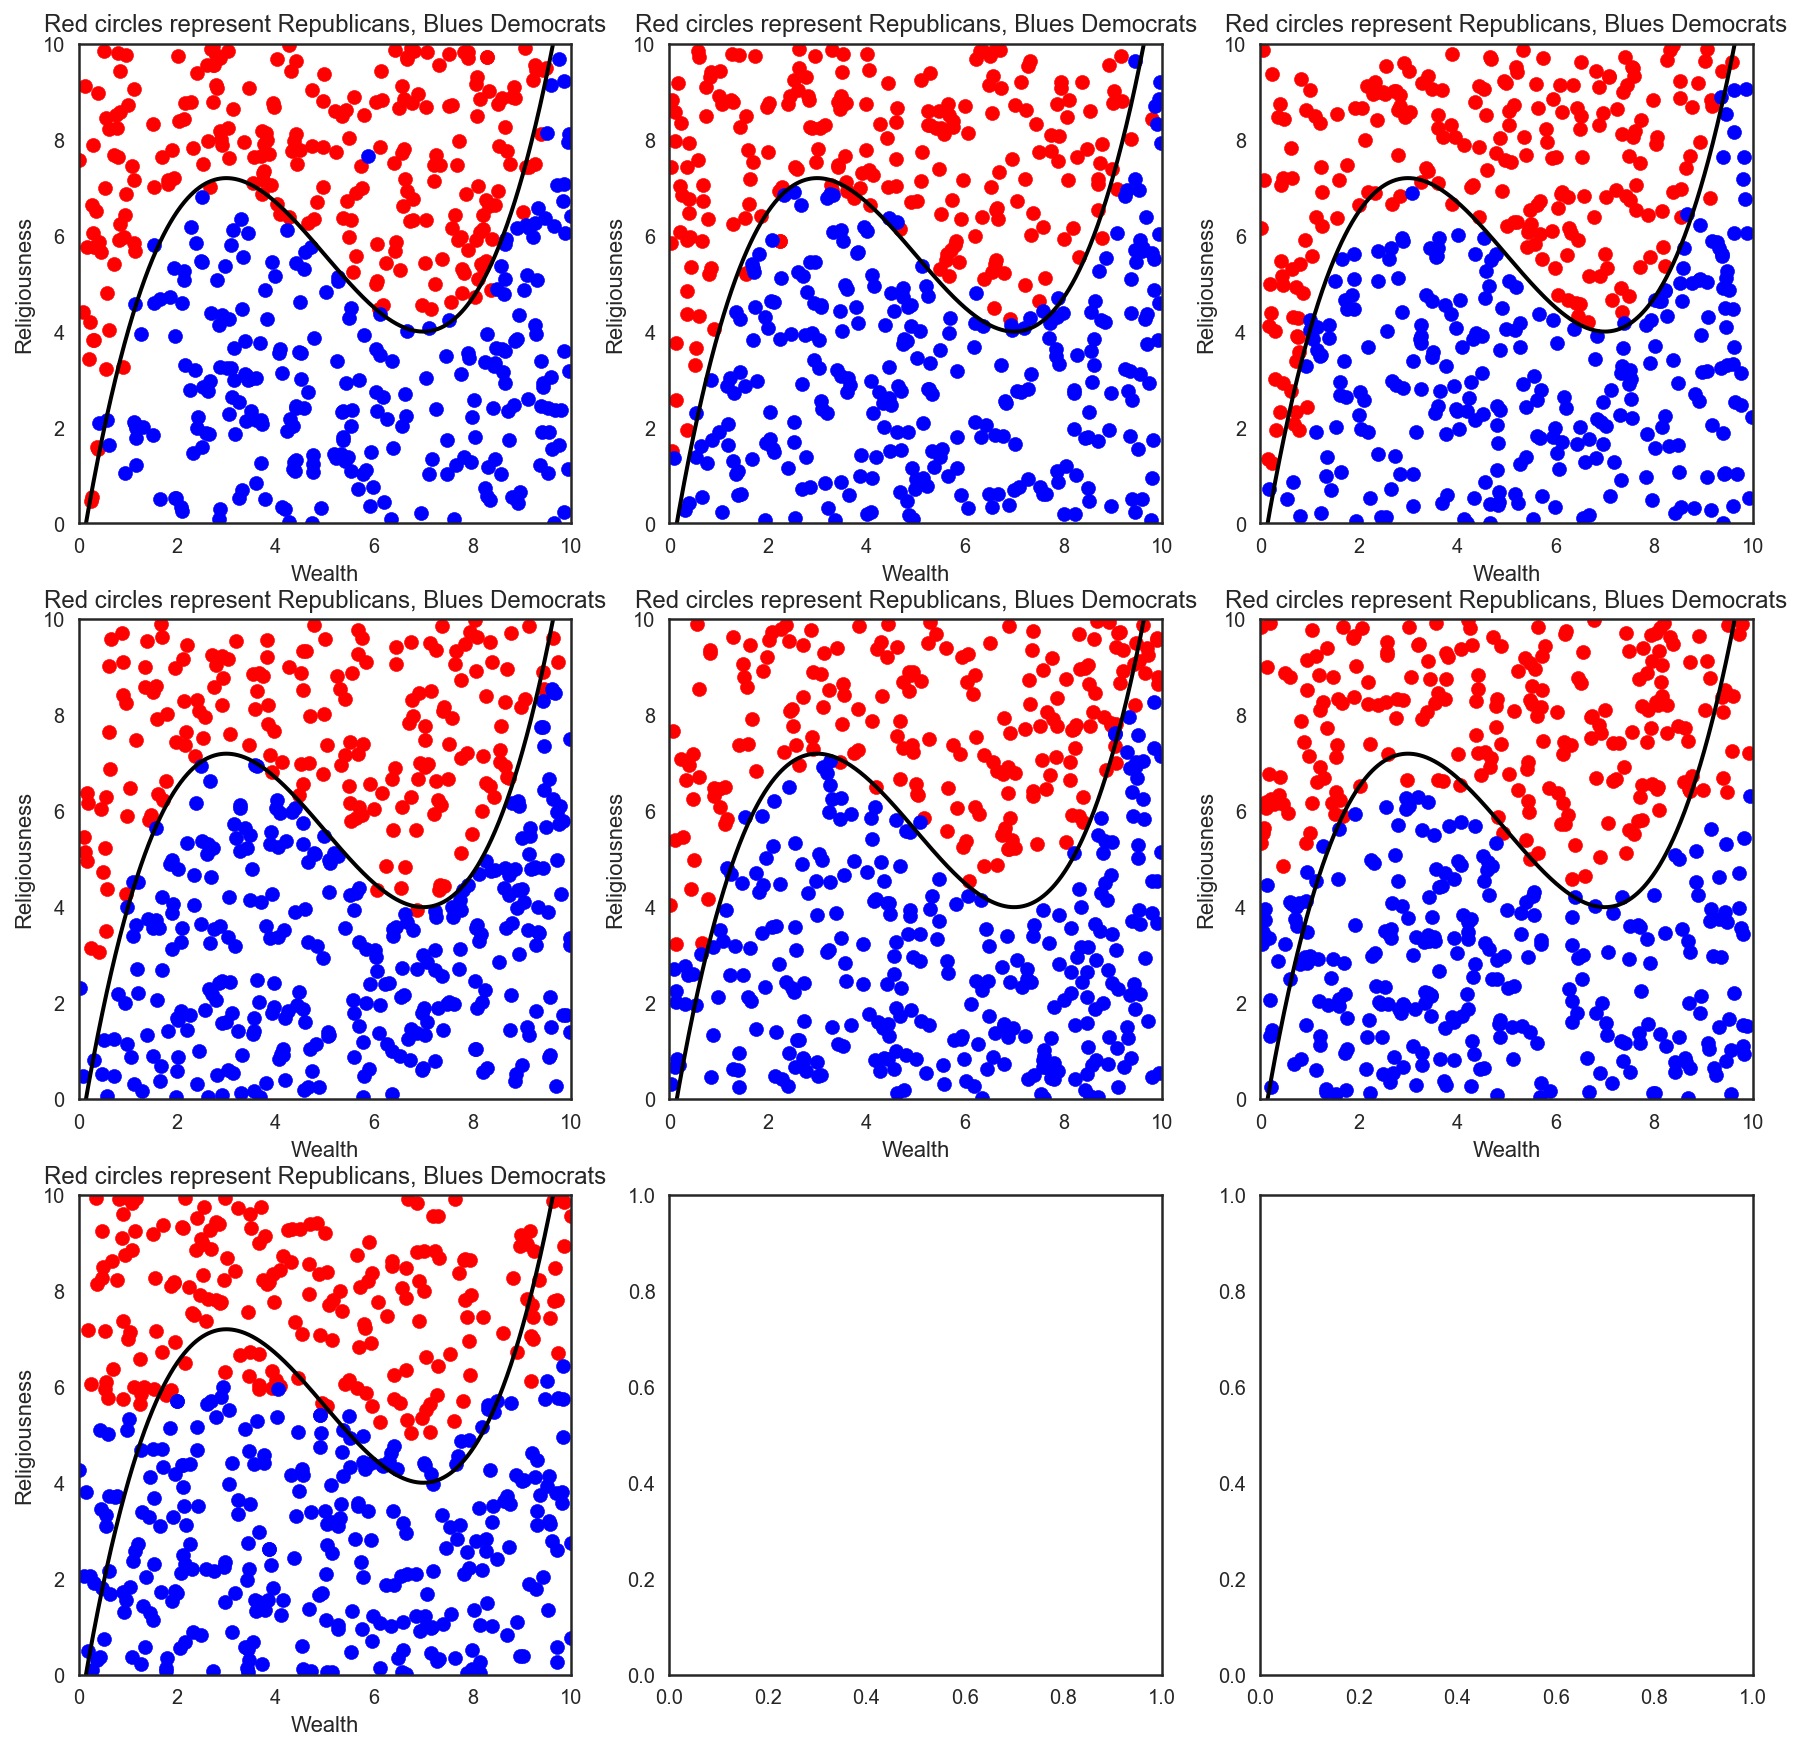

In [4]:
fig, axes = plt.subplots(3,3, figsize =(15,15))
ax = axes.flatten()
for index, neighbor in enumerate([1, 3, 5, 11, 21, 51, 99]):
    knn = kNNClassifier(neighbor)
    
    X_train, y_train = generate_data(m=500)
    knn.fit(X_train,y_train)
    
    X_test, labels = generate_data(m=500)
    
    y_test = knn.predict(X_test)
    
    print "neighbors:", neighbor, " accuracy ->", knn.get_accuracy(labels, y_test)
    plot_labeled_data(X_test, y_test, ax[index])

#fig.tight_layout()


### 1. Analyse the properties of kNN
Generate multiple sample data sets of size 500 (use the given function above), and plot the decision plane for increasing values of k (e.g.: 1, 3, 5, 11, 21, 51, 99).

The decision plane should cover the range [0,10] for both axes, coloring the patches that would be classified as Republicans or Democrats in two colors. It should look something like [that](https://drive.google.com/open?id=1jMD7I9sWT4w4O48pjwSPCFL1NLLPo10j).

Answer the following questions:
- How is the decision plain affected from changes in the sample set, as a function of k?
- Can you describe when do you underfit or overfit the data? 
- How does the complexity of this model depends on k?


In [5]:
from matplotlib.colors import ListedColormap
#class DecsisionBoundaries():
def make_mesh_hexbin(min_bound, max_bound,clf, h = 50):
    """Create a mesh of points to plot decision matrix"""
    X, y = generate_data(m=500)
    knn.fit(X,y)
    
    xy = np.vstack((np.linspace(min_bound, max_bound, h) , np.linspace(min_bound, max_bound, h)))
    xx_mesh, yy_mesh = np.meshgrid(xy[0], xy[1])
        
    Z = clf.predict(np.c_[xx_mesh.ravel(), yy_mesh.ravel()])
    #print pd.Series(Z).value_counts()
    return xx_mesh, yy_mesh, Z 

def plot_mesh_hexbin(ax, xx_mesh, yy_mesh, Z):
    """plot mesh plot"""
    sns.set(rc={"figure.figsize": (10, 10)})
    sns.set_style('white')
    cmap_bold = ListedColormap(['#00008B', '#8B0000'])
   # cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
        
        
    plt.figure()
    ax.set_xlabel("Weatlh")
    ax.set_ylabel("Religousness")
    ax.set_title("decision boundaries neighbors: %s" %knn.n_neighbors  )
    ax.set_ylim([0,10])
    ax.set_xlim([0,10])
    Z = Z
    
    ax.hexbin(xx_mesh.flatten(), yy_mesh.flatten(), C = Z, alpha = .8, gridsize=25, cmap=cmap_bold)
    ax.plot(np.linspace(0,10,1000), -true_boundary_voting_pred(np.linspace(0,10,1000), np.zeros(1000)), linewidth=2, c='k');
    
    
#knn = kNNClassifier(50)
#xx_mesh, yy_mesh, Z = make_mesh_grid(min_bound = 0, max_bound = 10, clf = knn)
#plot_mesh_grid(xx_mesh, yy_mesh, Z) 

In [8]:
#xx_mesh, yy_mesh, Z = make_mesh_hexbin(min_bound = 0, max_bound = 10, clf = knn)


In [9]:
#xx_mesh.shape

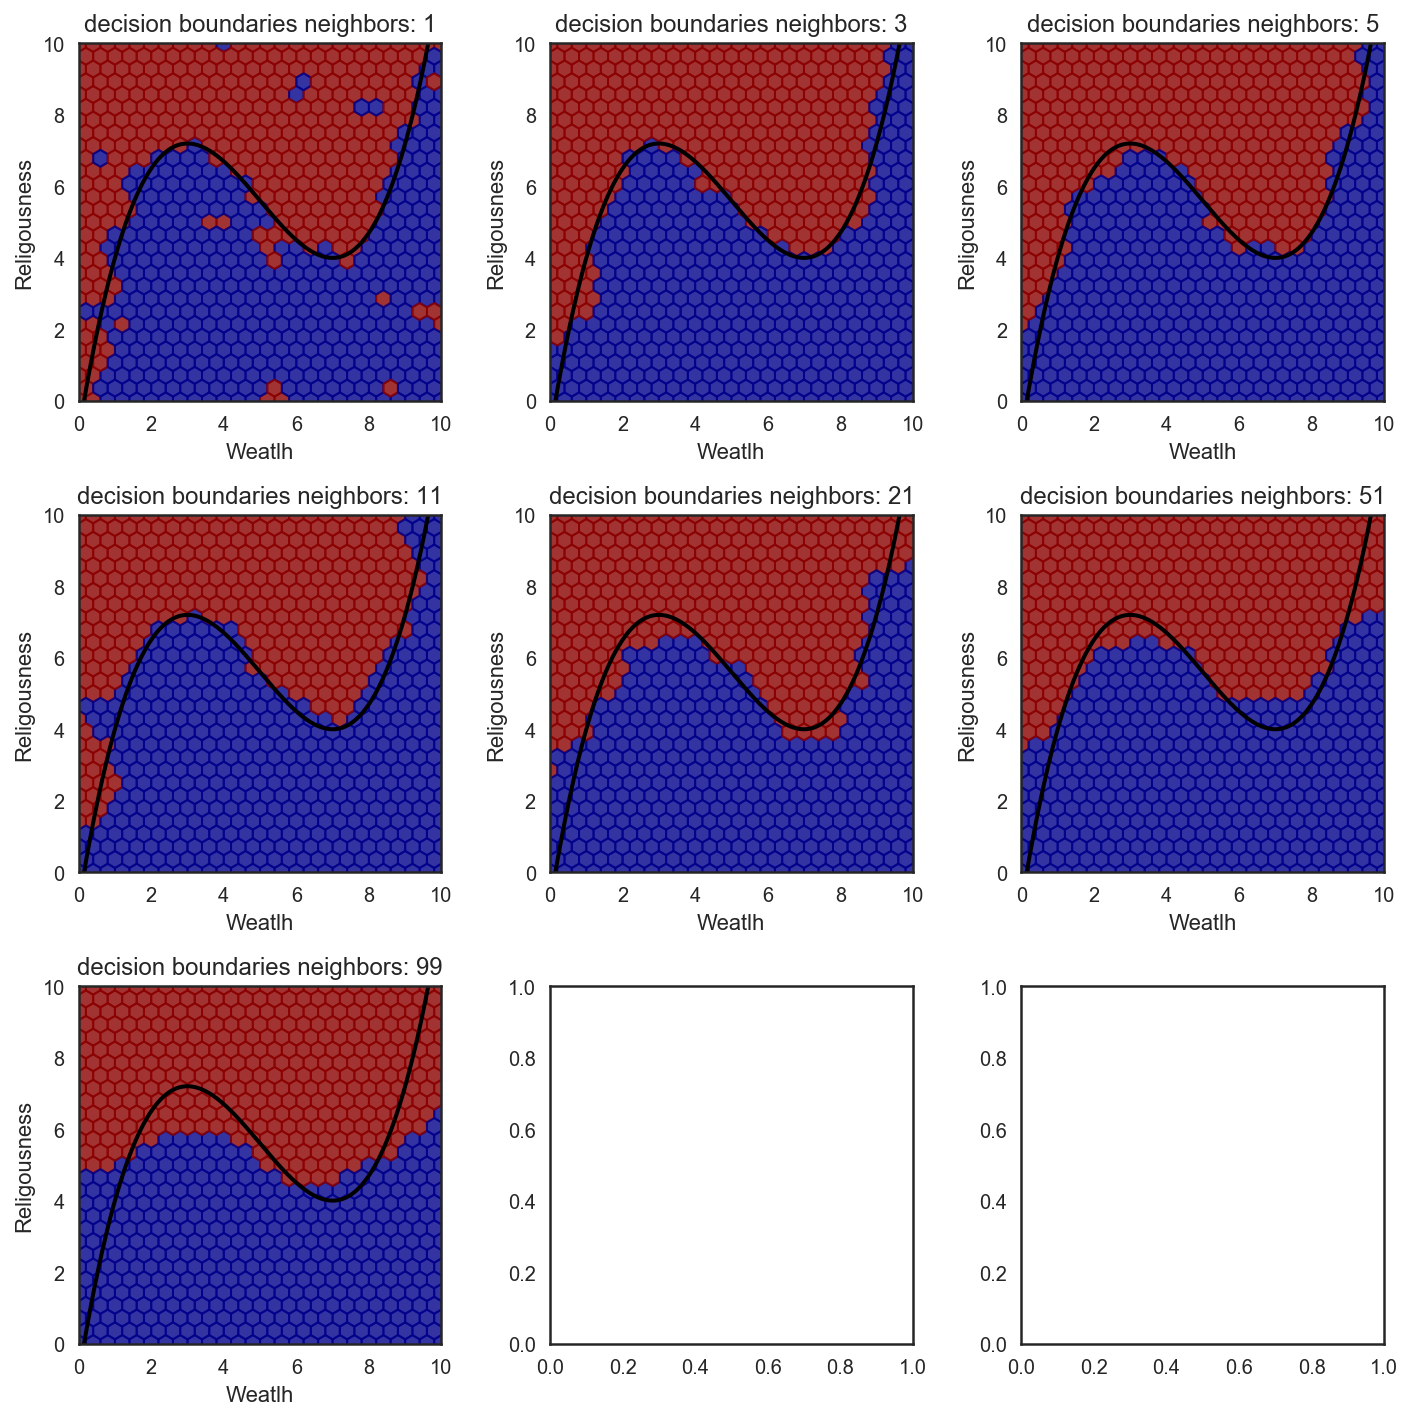

In [10]:
fig, axes = plt.subplots(3,3, figsize =(10,10))
#sns.set(rc={"figure.figsize": (15, 15)})

ax = axes.flatten()
for index, neighbor in enumerate([1, 3, 5, 11, 21, 51, 99]):
    knn = kNNClassifier(neighbor)
    xx_mesh, yy_mesh, Z = make_mesh_hexbin(min_bound = 0, max_bound = 10, clf = knn)
    
    # plot_mesh_grid(xx_mesh, yy_mesh, Z))
    plot_mesh_hexbin(ax[index],xx_mesh, yy_mesh, Z)
fig.tight_layout()
   

### How is the decision plain affected from changes in the sample set, as a function of k?
- as k neighbors increases the algorithm becomes overfit to the training data
### Can you describe when do you underfit or overfit the data?
- when we use less neighbors, low K we overfit the model to the data, when we use more neighbors we underfit the data to the model and it becomes too generalizeable. When we use a medium number of neihgbors, 5 we get the best fitting model
### How does the complexity of this model depends on k?
- complexity of this model depends on K, the more K we are using the more complexity. e^k

#class DecsisionBoundaries():
def make_mesh_grid(min_bound, max_bound,clf, h = 25):
    """Create a mesh of points to plot decision matrix"""
    X, y = generate_data(m=500)
    knn.fit(X,y)
    
    xy = np.vstack((np.linspace(min_bound, max_bound, h) , np.linspace(min_bound, max_bound, h)))
    xx_mesh, yy_mesh = np.meshgrid(xy[0], xy[1])
    
    xx, yy = xx_mesh.flatten(), yy_mesh.flatten()
    
    mesh_arr_flat = np.asarray([(pt_x, pt_y) for (pt_x,pt_y) in zip(xx,yy)]) 
    
    Z = clf.predict(mesh_arr_flat)

    return mesh_arr_flat, Z

def plot_mesh_grid(mesh_arr, Z):
    """plot mesh plot"""
    sns.set(rc={"figure.figsize": (10, 10)})
    sns.set_style('white')
    plt.figure()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("decision boundaries neighbors: %s" %knn.n_neighbors)

    for pt, label in zip(mesh_arr, Z):
        if label == 1.:
            plt.plot(pt[0],pt[1], marker = "H", markersize = 20, color = "darkred")
        else:
            plt.plot(pt[0], pt[1], marker = "H", markersize = 20, color = "steelblue")
    plt.show()
#knn = kNNClassifier(50)
#mesh_arr, Z = make_mesh_hex(min_bound = 0, max_bound = 10, clf = knn)
#plot_mesh_grid(mesh_arr, Z)

for neighbor in [1, 3, 5, 11, 21, 51, 99]:
    
    knn = kNNClassifier(neighbor)
    mesh_arr, Z = make_mesh_grid(min_bound = 0, max_bound = 10, clf = knn)
    #plot_mesh_grid(mesh_arr, Z)

Text goes here...

### 2. Finding the optimal k
Sample a single sample set of size 1000 and divide it randomly to train (0.6) / validation (0.2) / test (0.2) sets. Plot the train vs validation error for several k values, and choose the best k. Where do you underfit/overfit the data? Finally, estimate the generalization error of your chosen classifier using the test set.

- calculate error on training data, we call that bias
- calculate error on validation data we call that variance


     bias   variance
1    0.00  18.333333
3    9.75  14.666667
5   12.00  14.333333
9   13.25  13.333333
15  12.50  15.000000
20  15.50  16.000000
50  17.25  20.000000
99  18.25  20.000000
generalization error for best fit mdoel:  neighbors:  9 -> 13.3333333333


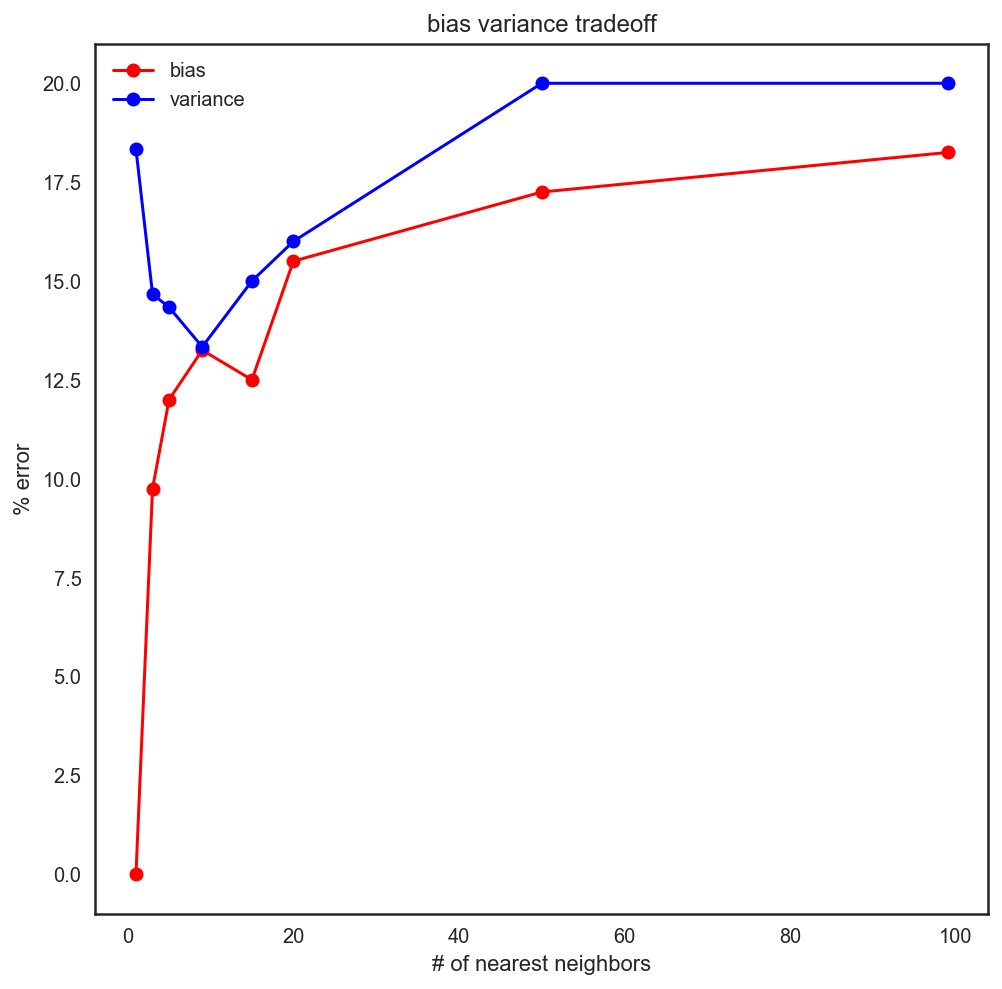

In [10]:
# code goes here

sns.set(rc={"figure.figsize": (8, 8)})
sns.set_style('white')

from sklearn.cross_validation import train_test_split

bias = {}
variance = {}
X_sample, y_sample = generate_data(m=1000)
X_train, X_test_valid, y_train, y_test_valid = train_test_split(X_sample, y_sample, test_size = .6)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_valid, y_test_valid, test_size = .5)

for neighbor in [1,3,5,9,15,20,50,99]:
    
    knn = kNNClassifier(neighbor)
    knn.fit(X_train,y_train) 
    Z = knn.predict(X_train)    
    
    # determine training error
    bias_error = 100 - knn.get_accuracy(y_train, Z)
    bias[neighbor] = bias_error

    #print "neighbors:", neighbor, " error ->", bias_error

    # determine validation error
    Z = knn.predict(X_valid)    
    variance_error = 100 - knn.get_accuracy(y_valid, Z)
    variance[neighbor] = variance_error
    
error_df = pd.DataFrame({"bias": pd.Series(bias),"variance": pd.Series(variance)})

print error_df
plt.figure()
# ax.set_xlabel("neighbors")
# #ax.set_xticklabels([i for i in acc_df.neighbors])

# ax.set_ylabel("validation error")

plt.plot(error_df.index, error_df.bias, color = "red", lw = 1.5, marker = "o", label = "bias" )
plt.plot(error_df.index, error_df.variance, color = "blue", lw = 1.5, marker = "o", label = "variance")
plt.title("bias variance tradeoff")
plt.ylabel("% error")
plt.xlabel("# of nearest neighbors")
plt.legend()


best_fit = min(variance, key=variance.get)
knn = kNNClassifier(best_fit)
knn.fit(X_train,y_train)

Z = knn.predict(X_test)    

generalization_error = 100 - knn.get_accuracy(y_test, Z)
print "generalization error for best fit mdoel: ", "neighbors: ", best_fit, "->", generalization_error

Text goes here...

### 3. Using cross validation
This time, put the test data aside (0.2 of the data), and apply 5-fold CV on the remaining data to evaluate the performance of each k value. 
What is the size of the validation and train set now, in each CV iteration?
Did your final model selection change? Explain why.
- my model selection changed selecting the model with the lowest variance in my predictions, was now 20 nearest neighbors compared to 9 beforehand.
- my validation size is 140 and my train size is 560 in each iteration, and i'm taking the mean of all the preidctions

# https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

In [43]:
kf_data_x = np.concatenate([X_train, X_valid])
kf_data_y = np.concatenate([y_train, y_valid])

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

#for data,train in kf.split(kf_data_x):
   # print target


bias_avg_list = {}

for neighbor in [1,3,5,9,15,20,50,99]:
    bias = []
    knn = kNNClassifier(neighbor)
    for train, valid in kf.split(kf_data_x):
        cv_train_x = kf_data_x[train]
        cv_train_y = kf_data_y[train]
        
        cv_valid_x = kf_data_x[valid]
        cv_valid_y = kf_data_y[valid]
        
        #print cv_train_x.shape, cv_train_y.shape
        knn = kNNClassifier(neighbor)
        knn.fit(cv_train_x,cv_train_y) 
        
        Z = knn.predict(cv_valid_x)    
        # determine training error
        bias_error = 100 - knn.get_accuracy(cv_valid_y, Z)
        bias.append(bias_error)
    print "neighbors: ", neighbor, "variance: ", np.mean(bias)

    bias_avg_list[neighbor] = (np.mean(bias))


neighbors:  1 variance:  20.1428571429
neighbors:  3 variance:  16.0
neighbors:  5 variance:  15.7142857143
neighbors:  9 variance:  13.5714285714
neighbors:  15 variance:  13.5714285714
neighbors:  20 variance:  13.4285714286
neighbors:  50 variance:  15.8571428571
neighbors:  99 variance:  19.0


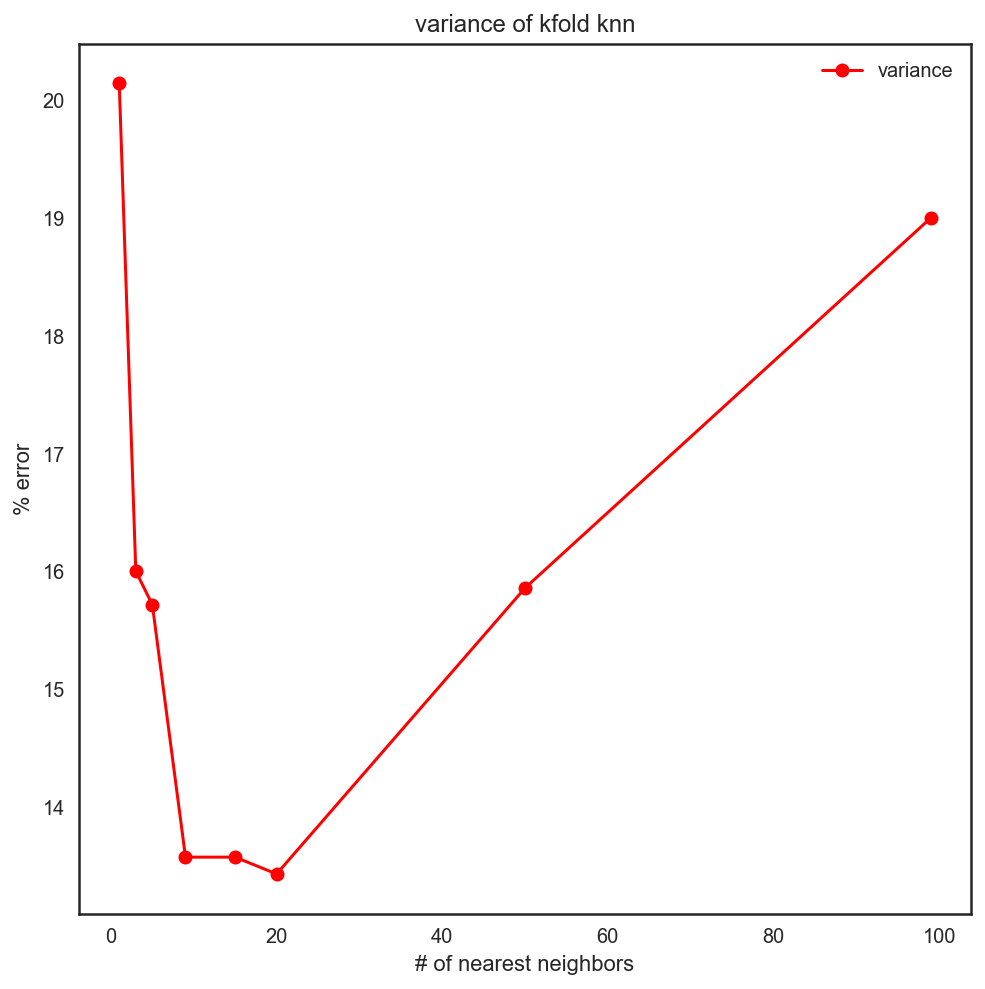

In [45]:
error_df = pd.DataFrame(pd.Series(bias_avg_list))
error_df.columns = ["bias"]

plt.figure()

plt.plot(error_df.index, error_df.bias, color = "red", lw = 1.5, marker = "o", label = "variance" )
#plt.plot(error_df.index, error_df.variance, color = "blue", lw = 1.5, marker = "o", label = "variance")
plt.title("variance of kfold knn")
plt.ylabel("% error")
plt.xlabel("# of nearest neighbors")
plt.legend()


In [46]:

best_fit = min(bias_avg_list, key=bias_avg_list.get)
knn = kNNClassifier(best_fit)
knn.fit(X_train,y_train)

Z = knn.predict(X_test)    

generalization_error = 100 - knn.get_accuracy(y_test, Z)
print "generalization error for best fit mdoel: ", "neighbors: ", best_fit, "->", generalization_error

generalization error for best fit mdoel:  neighbors:  20 -> 15.0


Text goes here...